In [1]:
# https://download.pytorch.org/tutorial/data.zip
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string


#########################################################
all_letters = string.ascii_letters + " .,;'"  ## NO TOUCH! ONLY THROW!
n_letters = len(all_letters)
#########################################################



# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
#category_lines  { "all_categories[index]" : list_of_names}
# print(all_categories)
# print(category_lines[all_categories[0]])


# important stuff from this box is
# category_lines = dict with all stuff
# all_categories = list with all keys for category_lines
# n_categories = number of categories.
# n_letters = number of letters, or your input dimensions

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski


In [2]:
# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(n_letters)
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(n_letters)
    for letter in (line):
        tensor[all_letters.find(letter)] += 1
    return tensor.unsqueeze(0)

print(lineToTensor('Jones').size()) # 57

torch.Size([1, 57])


In [3]:
def randomTrainingExample(batch_size,n_categories,istrain):
    line_holder = torch.zeros(batch_size,1,57)
    cat_holder = torch.zeros(batch_size)
    for i in range(batch_size):
        if istrain:
            category = all_categories[random.randint(0, len(all_categories) - 1)]
            line = category_lines[category][random.randint(0, int(len(category_lines[category]) - 1/5*4))]
            line_holder[i] = lineToTensor(line)
            cat_holder[i]=all_categories.index(category) # indicate that this particular is the correct ans
#         category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
#         line_tensor = 
        else:
            category = all_categories[random.randint(0, len(all_categories) - 1)]
            line = category_lines[category][random.randint( int(len(category_lines[category])/5*4), len(category_lines[category]) - 1)]
            line_holder[i] = lineToTensor(line)
            cat_holder[i]=all_categories.index(category) # indicate that this particular is the correct ans
    return cat_holder,line_holder

# for i in range(10):
#     category, line, category_tensor, line_tensor = randomTrainingExample()
#     print('category =', category, '/ line =', line)

In [37]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)   # obtain the max value value, index
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [38]:
# word_embeddings = nn.Embedding(vocab_size, n_categories) # word embeddings appear to be useless
# linear_layer = nn.Linear(hidden_dim, tagset_size)# we then add a linear to it.. make it more sensible..?
class lstm_class(nn.Module):
    def __init__(self, n_letters, n_categories,hidden_number,num_layers ): 
        super(lstm_class, self).__init__()
        self.lstm = nn.LSTM(n_letters, hidden_number,num_layers =num_layers)  # Input dim is 3, output dim is number of hidden layers
        self.hidden2tag = nn.Linear(hidden_number, n_categories)
#         self.softmax = nn.Softmax(dim=1)
    def forward(self,states,name):        
        h_n,c_n = self.lstm(name,states)
        # h_n is the h output at each word ...
        # c_n is the outputs i want. 
#         print(h_n.shape) # torch.Size([6, 1, 57])
#         print(len(c_n))
#         print(c_n[0].shape)
#         print(c_n[1].shape)
        out1 = self.hidden2tag(h_n).float().squeeze(1)
#         out2 = self.softmax(out1).squeeze(1)
        out2 = out1
        return out2

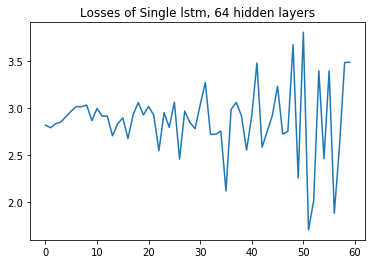

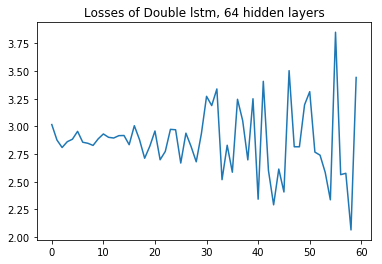

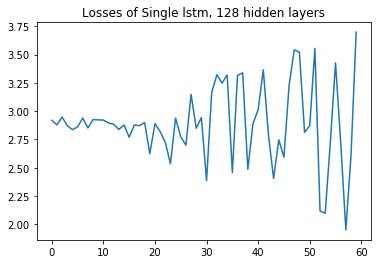

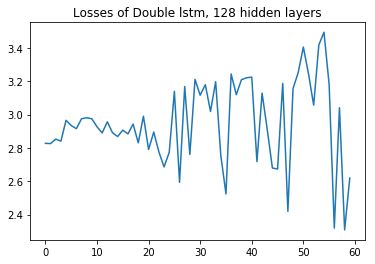

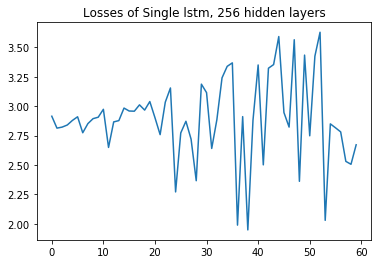

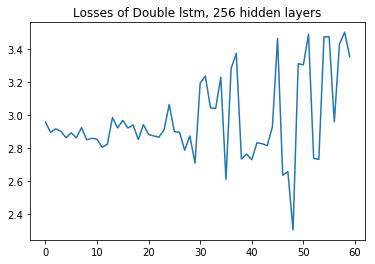

Single layer LSTM model with 64 hidden layers Accuracy = 5.59 %
2 layer LSTM model with 64 hidden layers Accuracy = 5.59 %
Single layer LSTM model with 128 hidden layers Accuracy = 5.35 %
2 layer LSTM model with 128 hidden layers Accuracy = 5.35 %


KeyboardInterrupt: 

In [41]:
single_losses = []
dual_losses = []
layers = [64,128,256]

for k in layers:
    single_loss = []
    epochs =60
    recording_interval =1000
    dual_loss = []
    lowest_loss_single = 9999
    lowest_loss_dual = 9999
    no_hidden_layers = k
    single_lstm = lstm_class(n_letters, n_categories,no_hidden_layers,1)
    dual_lstm =  lstm_class(n_letters, n_categories,no_hidden_layers,2)
    loss_function = nn.CrossEntropyLoss()
    batch_size =1
    singleoptimizer = optim.SGD(single_lstm.parameters(), lr=0.01)
#     optim.lr_scheduler.StepLR(singleoptimizer,5 ,0.1, last_epoch=-1)
    dualoptimizer = optim.SGD(dual_lstm.parameters(), lr=0.01)
#     optim.lr_scheduler.StepLR(dualoptimizer,5 ,0.1, last_epoch=-1)
    ##############################################################
    ##                                                          ##
    ##                    single batch, no padding              ##
    ##                                                          ##
    ##############################################################


    ######################################################################################################################
    for i in range(epochs):
        category_tensor, line_tensor = randomTrainingExample(batch_size,n_categories,True)
        initial = torch.zeros(1,1, no_hidden_layers)
        hidden = torch.zeros(1, 1, no_hidden_layers)
        states = initial,hidden 
        output = single_lstm(states,line_tensor)  # torch.Size([6, 18])
        loss = loss_function(output, category_tensor.long())
        if i%recording_interval ==0:
            single_loss.append(loss.item())
        if(loss.item()<lowest_loss_single):
            lowest_loss_single = loss.item()
            torch.save(single_lstm.state_dict(), f"best_single_lstm_model{k}.pt")
        loss.backward()
        singleoptimizer.step()
    ######################################################################################################################

    ######################################################################################################################
    for i in range(epochs):
        category_tensor, line_tensor = randomTrainingExample(batch_size,n_categories,True)
        initial = torch.zeros(2,1, no_hidden_layers)
        hidden = torch.zeros(2, 1, no_hidden_layers)
        states = initial,hidden 
        output = dual_lstm(states,line_tensor)  # torch.Size([6, 18])
        loss = loss_function(output, category_tensor.long())
        dual_loss.append(loss.item())
        if i%recording_interval ==0:
            single_loss.append(loss.item())
        if(loss.item()<lowest_loss_dual):
            lowest_loss_dual = loss.item()
            torch.save(dual_lstm.state_dict(), f"best_dual_lstm_model{k}.pt")
        loss.backward()
        dualoptimizer.step()
    ######################################################################################################################
    single_losses.append(single_loss)
    dual_losses.append(dual_loss)


for i in range(len(layers)):
    plt.plot(single_losses[i])
    plt.title(f"Losses of Single lstm, {layers[i]} hidden layers")
    plt.show()
    
    plt.plot(dual_losses[i])
    plt.title(f"Losses of Double lstm, {layers[i]} hidden layers")
    plt.show()

    
total_tests = 1000
softy = nn.Softmax(dim=1)


for i in layers:
    single_lstm = lstm_class(n_letters, n_categories,no_hidden_layers,1)
    single_lstm.load_state_dict(torch.load(f"best_single_lstm_model{k}.pt"))
    dual_lstm =  lstm_class(n_letters, n_categories,no_hidden_layers,2)
    dual_lstm.load_state_dict(torch.load(f"best_dual_lstm_model{k}.pt"))
    single_correct = 0
    dual_correct=0
    with torch.no_grad():
        for z in range(total_tests):
            category_tensor, line_tensor = randomTrainingExample(1,n_categories,False)
            ########################################################################################
            initial = torch.zeros(1,1, no_hidden_layers)
            hidden = torch.zeros(1, 1, no_hidden_layers)
            states = initial,hidden 
            output = single_lstm(states,line_tensor)  # torch.Size([6, 18])
            output = softy(output)
    #         print(categoryFromOutput(softy(output)))
            #top_n, top_i = output.topk(1)
    #         print(category_tensor)
            if output.topk(1)[1] ==category_tensor.long():
                single_correct+=1
            ########################################################################################
            initial = torch.zeros(2,1, no_hidden_layers)
            hidden = torch.zeros(2, 1, no_hidden_layers)
            states = initial,hidden 
            output = dual_lstm(states,line_tensor)  # torch.Size([6, 18])
            output = softy(output)

            if output.topk(1)[1] ==category_tensor.long():
                    dual_correct+=1
            
            # dual
            ########################################################################################
    single_accuracy = single_correct/total_tests*100
    dual_accuracy = dual_correct/total_tests*100
    print(f"Single layer LSTM model with {i} hidden layers Accuracy = {single_accuracy} %")
    print(f"2 layer LSTM model with {i} hidden layers Accuracy = {dual_accuracy} %")
print("done")
    


# Just return an output given a line

